In [10]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
df = pd.read_csv('CombinedBettingData2.csv')
df.head()

,Unnamed: 0,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Date,...,Pinnacle Sports,5Dimes,Bookmaker,BetOnline,Bovada,Heritage,Intertops,YouWager,JustBet,Sportsbetting
0,0,LAC,GSW,31.0,19.0,0.620,43.0,7.0,0.860,2017-02-02,...,-7.5,-7.5,-7.5,-7.5,-8.5,-8.0,-7.5,-8.0,-7.5,-7.5
1,1,PHX,LAC,15.0,34.0,0.306,31.0,18.0,0.633,2017-02-01,...,-2.5,-2.5,-2.5,-2.5,-3.0,-2.5,-2.5,-2.5,-2.5,-2.5
2,2,PHI,LAC,16.0,27.0,0.372,30.0,17.0,0.638,2017-01-24,...,-4.5,-4.5,-4.5,-4.5,-5.0,-4.5,-4.5,-4.5,-4.5,-4.5
3,3,ATL,LAC,26.0,19.0,0.578,30.0,16.0,0.652,2017-01-23,...,7.0,7.0,7.5,7.5,8.0,7.5,7.5,7.5,7.5,7.5
4,4,LAC,LAL,28.0,14.0,0.667,15.0,29.0,0.341,2017-01-14,...,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5


In [11]:
df = df.dropna()
df['average'] = (df['Pinnacle Sports'] + df['5Dimes'] + df['Bookmaker'] + df['BetOnline'] + df['Bovada'] + df['Heritage'] + df['Intertops'] + df['YouWager'] + df['JustBet'] + df['Sportsbetting'])/10
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Date,WinMargin,...,5Dimes,Bookmaker,BetOnline,Bovada,Heritage,Intertops,YouWager,JustBet,Sportsbetting,average
0,LAC,GSW,31.0,19.0,0.620,43.0,7.0,0.860,2017-02-02,-13,...,-7.5,-7.5,-7.5,-8.5,-8.0,-7.5,-8.0,-7.5,-7.5,-7.70
1,PHX,LAC,15.0,34.0,0.306,31.0,18.0,0.633,2017-02-01,-10,...,-2.5,-2.5,-2.5,-3.0,-2.5,-2.5,-2.5,-2.5,-2.5,-2.55
2,PHI,LAC,16.0,27.0,0.372,30.0,17.0,0.638,2017-01-24,11,...,-4.5,-4.5,-4.5,-5.0,-4.5,-4.5,-4.5,-4.5,-4.5,-4.55
3,ATL,LAC,26.0,19.0,0.578,30.0,16.0,0.652,2017-01-23,-10,...,7.0,7.5,7.5,8.0,7.5,7.5,7.5,7.5,7.5,7.45
4,LAC,LAL,28.0,14.0,0.667,15.0,29.0,0.341,2017-01-14,16,...,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.5,11.50


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df['Weekday'] = df['Date'].dt.dayofweek
df = df.sort_values(by=['Date'])
df = df.reset_index()
df = df.drop(['index'], axis=1)
df.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Date,WinMargin,...,Heritage,Intertops,YouWager,JustBet,Sportsbetting,average,Year,Month,Week,Weekday
0,OKC,ORL,1.0,0.0,1.0,0.0,1.0,0.0,2011-12-25,8,...,8.0,7.5,7.5,7.5,7.5,7.55,2011,12,51,6
1,NYK,BOS,1.0,0.0,1.0,0.0,1.0,0.0,2011-12-25,2,...,4.5,4.5,5.0,4.5,5.0,4.70,2011,12,51,6
2,DAL,MIA,0.0,1.0,0.0,1.0,0.0,1.0,2011-12-25,-11,...,-5.0,-4.5,-4.5,-4.5,-5.0,-4.75,2011,12,51,6
3,GSW,LAC,0.0,1.0,0.0,1.0,0.0,1.0,2011-12-25,-19,...,-4.0,-4.5,-4.5,-4.5,-5.0,-4.70,2011,12,51,6
4,LAL,CHI,0.0,1.0,0.0,1.0,0.0,1.0,2011-12-25,-1,...,-5.0,-5.0,-5.0,-5.5,-5.5,-5.25,2011,12,51,6


In [13]:
cols_at_end = ['WinMargin']
df = df[[c for c in df if c not in cols_at_end] + [c for c in cols_at_end if c in df]]
team = df.HomeTeam.unique()
team_dict = dict(zip(team, range(len(team))))
df1 = df.copy(deep=True)
df1 = df1.replace({'HomeTeam': team_dict})
df1 = df1.replace({'AwayTeam': team_dict})
df1 = df1.drop(['Date'], axis=1)
df1.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Pinnacle Sports,5Dimes,...,Intertops,YouWager,JustBet,Sportsbetting,average,Year,Month,Week,Weekday,WinMargin
0,0,7,1.0,0.0,1.0,0.0,1.0,0.0,7.5,7.5,...,7.5,7.5,7.5,7.5,7.55,2011,12,51,6,8
1,1,25,1.0,0.0,1.0,0.0,1.0,0.0,4.5,4.5,...,4.5,5.0,4.5,5.0,4.70,2011,12,51,6,2
2,2,17,0.0,1.0,0.0,1.0,0.0,1.0,-4.5,-4.5,...,-4.5,-4.5,-4.5,-5.0,-4.75,2011,12,51,6,-11
3,3,27,0.0,1.0,0.0,1.0,0.0,1.0,-4.5,-4.5,...,-4.5,-4.5,-4.5,-5.0,-4.70,2011,12,51,6,-19
4,4,28,0.0,1.0,0.0,1.0,0.0,1.0,-5.0,-5.5,...,-5.0,-5.0,-5.5,-5.5,-5.25,2011,12,51,6,-1


In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
cols = df1.columns
sc2 = StandardScaler()
df1 = df1.dropna()
df2 = df1.copy(deep=True)
for col in cols:
    df2[[col]] = sc2.fit_transform(df2[[col]])
df2.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Pinnacle Sports,5Dimes,...,Intertops,YouWager,JustBet,Sportsbetting,average,Year,Month,Week,Weekday,WinMargin
0,-1.618782,-0.871963,-1.329239,-1.387284,2.569019,-1.400287,-1.328754,-2.592875,0.698551,0.698655,...,0.700096,0.696702,0.698385,0.701321,0.706162,-1.909198,1.508709,1.538777,1.528771,0.385654
1,-1.511539,1.058493,-1.329239,-1.387284,2.569019,-1.400287,-1.328754,-2.592875,0.236477,0.237693,...,0.239199,0.314582,0.237108,0.317511,0.269420,-1.909198,1.508709,1.538777,1.528771,-0.059762
2,-1.404297,0.200512,-1.400881,-1.315853,-2.646715,-1.328364,-1.400466,2.640976,-1.149745,-1.145193,...,-1.143495,-1.137474,-1.146723,-1.217728,-1.178727,-1.909198,1.508709,1.538777,1.528771,-1.024829
3,-1.297054,1.272988,-1.400881,-1.315853,-2.646715,-1.328364,-1.400466,2.640976,-1.149745,-1.145193,...,-1.143495,-1.137474,-1.146723,-1.217728,-1.171065,-1.909198,1.508709,1.538777,1.528771,-1.618717
4,-1.189812,1.380235,-1.400881,-1.315853,-2.646715,-1.328364,-1.400466,2.640976,-1.226757,-1.298847,...,-1.220311,-1.213898,-1.300482,-1.294490,-1.255349,-1.909198,1.508709,1.538777,1.528771,-0.282470


In [15]:
df3 = df2.copy(deep=True)
#df3 = df3.drop(['Date'], axis=1)

In [16]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [23], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [23], axis=1)
test_x=tests[0]
test_y=tests[1]

In [17]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [27]:
test_x.head()

,HomeTeam,AwayTeam,HTWin,HTLoss,HT%,ATWin,ATLoss,AT%,Pinnacle Sports,5Dimes,...,Heritage,Intertops,YouWager,JustBet,Sportsbetting,average,Year,Month,Week,Weekday
6750,-0.439114,-1.086458,0.103595,1.112795,-0.690815,1.332788,-0.253085,1.091756,-0.995720,-0.991539,...,-1.065041,-1.066679,-1.061050,-1.069843,-0.987442,-1.048471,1.143179,-0.802541,-0.791082,-1.021094
6751,1.062282,1.487483,1.249862,-0.030098,0.800885,0.110097,1.109430,-0.630181,1.083613,1.082790,...,1.078415,1.084178,1.002398,1.005903,1.085130,1.058621,1.143179,-0.802541,-0.791082,-0.511121
6752,-1.082569,-0.121230,1.393145,-0.244390,1.051240,0.685481,0.535740,0.118260,0.544527,0.468174,...,0.542551,0.469647,0.467430,0.467747,0.471035,0.491622,1.143179,-0.802541,-0.791082,-0.511121
6753,1.598495,-0.013983,-0.756105,1.969965,-1.806982,0.397789,0.750874,-0.211473,-1.226757,-1.222020,...,-1.218145,-1.220311,-1.213898,-1.223602,-1.217728,-1.224700,1.143179,-0.802541,-0.791082,-0.511121
6754,0.633312,1.701978,1.034937,0.327056,0.409705,0.253943,1.037719,-0.478399,0.775564,0.775482,...,0.772207,0.776913,0.773126,0.775265,0.778082,0.775122,1.143179,-0.802541,-0.791082,-0.511121


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


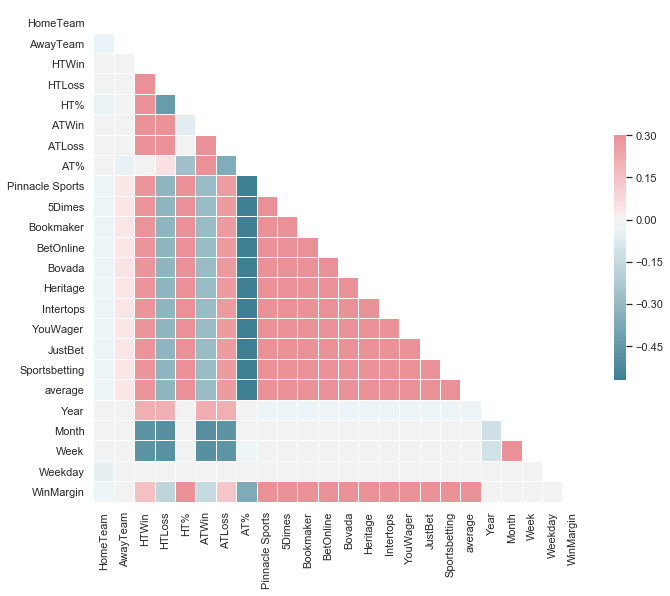

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([[-0.01228876, -0.01568839, -0.05733534, -0.13825956,  0.19723016,
         0.07732724,  0.11371341, -0.18579552,  0.31403098, -0.17173778,
         0.05328045, -0.81255662, -0.78486682,  0.00909218,  0.18621244,
         0.27457236,  0.41420887,  0.70581176,  0.01634756,  0.0253822 ,
        -0.06388315,  0.04215541,  0.02752838]])

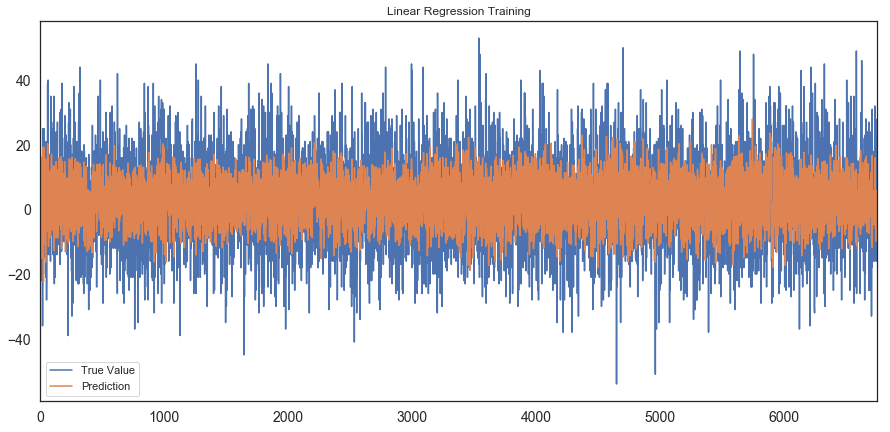

adj train r^2 = 0.2661574505354287
train mse = 131.44835080271807


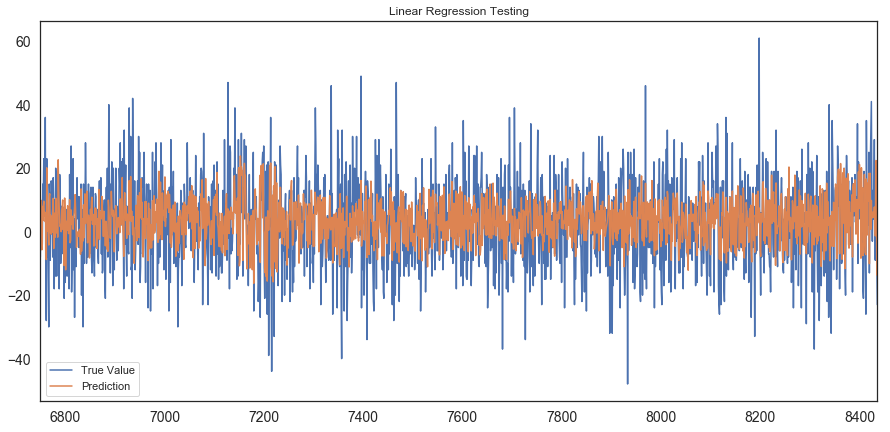

adj test r^2 = 0.22378080564458303
test mse = 145.66930065430145


In [26]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [31]:
from sklearn.metrics import accuracy_score
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 71.39%
The testing accuracy is 70.12%


## Naive Model

In [38]:
one = (len(train_y3[train_y3['Over']>.5]) + len(test_y3[test_y3['Over']>.5])) / (len(train_y3) + len(test_y3)) * 100
zero = (len(train_y3[train_y3['Over']<.5]) + len(test_y3[test_y3['Over']<.5])) / (len(train_y3) + len(test_y3)) * 100

In [39]:
print('Always picking over the line works ' + str(round(one,2)) + '% of the time')
print('Always picking under the line works ' + str(round(zero,2)) + '% of the time')

Always picking over the line works 58.72% of the time
Always picking under the line works 41.28% of the time


## Extra Trees

In [42]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.values)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

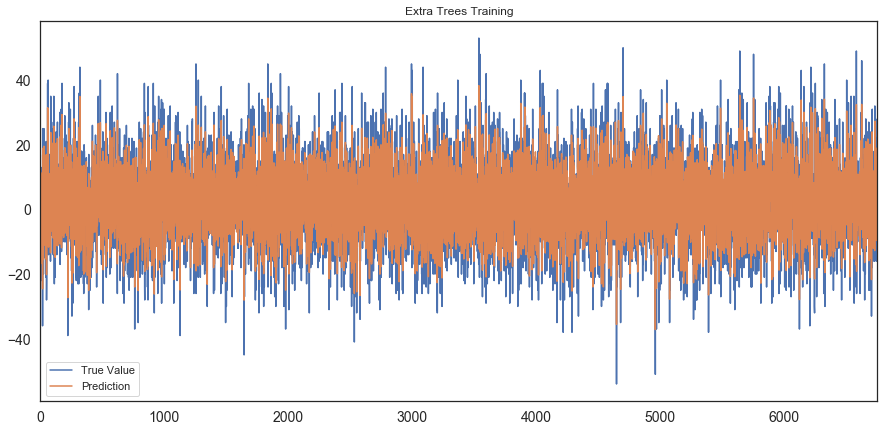

adj train r^2 = 0.8958825888910679
train mse = 18.64986159511111


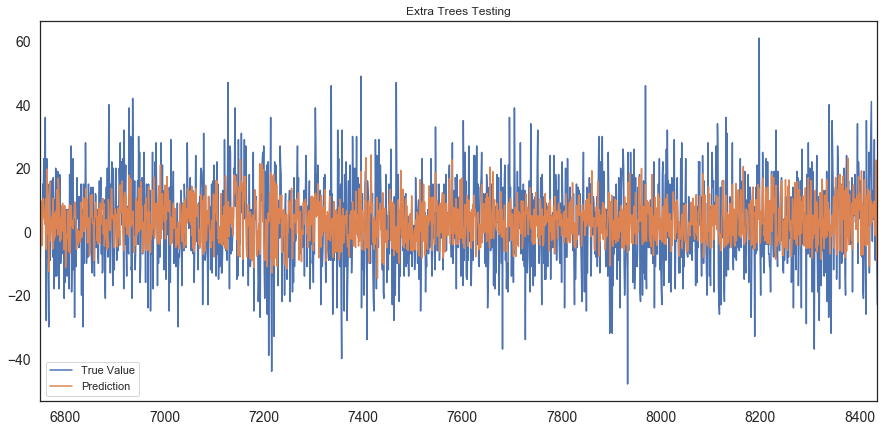

adj test r^2 = 0.18560390377725422
test mse = 152.8337751179609


In [43]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [44]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 96.61%
The testing accuracy is 67.52%


## Random Forrest

In [45]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.WinMargin.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

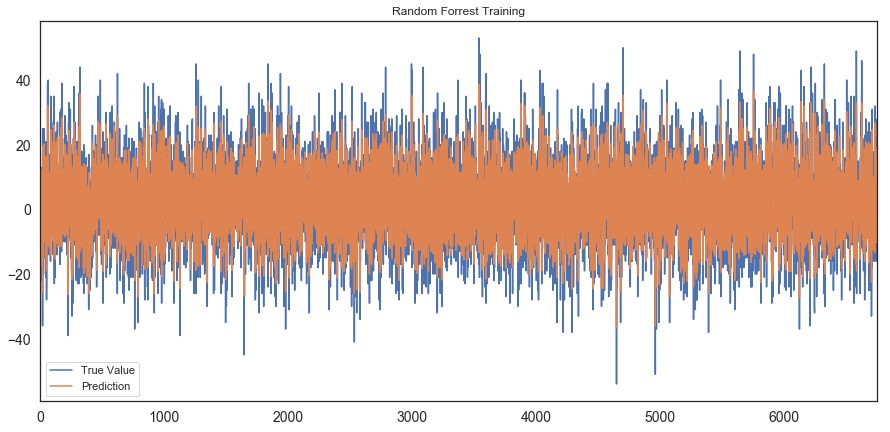

adj train r^2 = 0.8952447639540448
train mse = 18.76411094755556


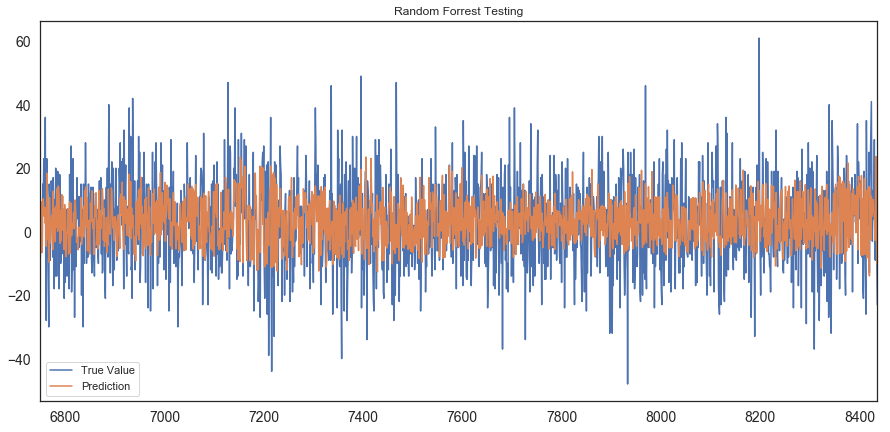

adj test r^2 = 0.18009833169502754
test mse = 153.86697919324246


In [46]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [47]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 96.39%
The testing accuracy is 67.63%


## XGBoost

In [48]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [55]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=10000, learning_rate=0.04)
reg.fit(train_x.values, train_y.WinMargin.values)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.04, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

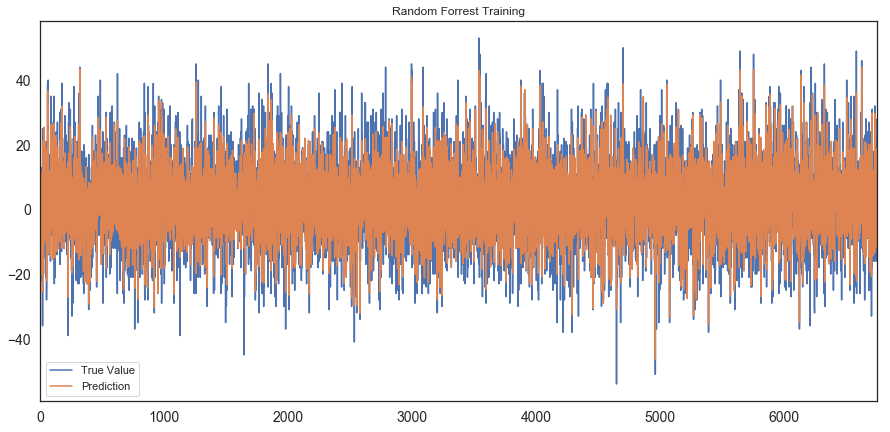

adj train r^2 = 0.8099380876317255
train mse = 34.0445303279959


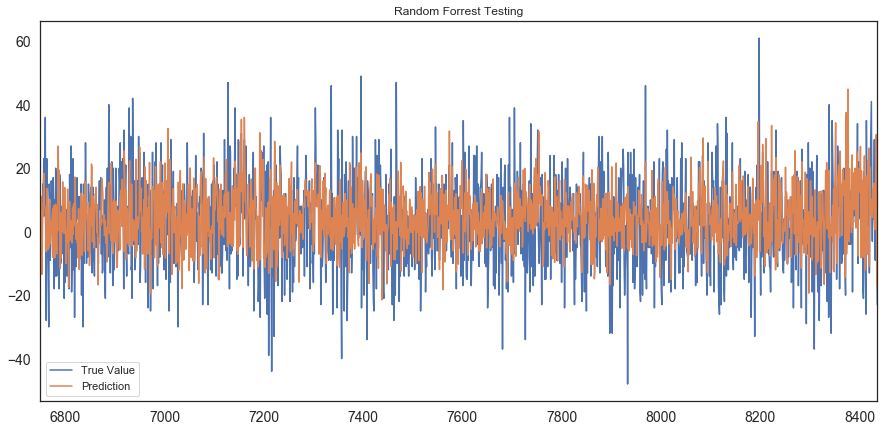

adj test r^2 = 0.013035232669836971
test mse = 185.21890269256886


In [56]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [57]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 89.99%
The testing accuracy is 64.37%


## Feed Forward Neural Network

In [58]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


In [70]:
K.clear_session()
model = Sequential()
model.add(Dense(64, input_dim=23, activation='linear'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=0, min_delta=.000001,restore_best_weights=True)
        
out = model.fit(train_x.values, train_y.WinMargin.values.ravel(), validation_data=[test_x.values, test_y['WinMargin'].values.ravel()], epochs=100,verbose=1,shuffle=False)

Train on 6750 samples, validate on 1687 samples
Epoch 1/100
6750/6750 [==============================] - 1s 149us/step - loss: 0.8146 - val_loss: 0.8835
Epoch 2/100
6750/6750 [==============================] - 0s 48us/step - loss: 0.7641 - val_loss: 0.8798
Epoch 3/100
6750/6750 [==============================] - 0s 47us/step - loss: 0.7496 - val_loss: 0.8598
Epoch 4/100
6750/6750 [==============================] - 0s 49us/step - loss: 0.7435 - val_loss: 0.8499
Epoch 5/100
6750/6750 [==============================] - 0s 49us/step - loss: 0.7387 - val_loss: 0.8346
Epoch 6/100
6750/6750 [==============================] - 0s 48us/step - loss: 0.7357 - val_loss: 0.8266
Epoch 7/100
6750/6750 [==============================] - 0s 46us/step - loss: 0.7337 - val_loss: 0.8215
Epoch 8/100
6750/6750 [==============================] - 0s 49us/step - loss: 0.7323 - val_loss: 0.8194
Epoch 9/100
6750/6750 [==============================] - 0s 46us/step - loss: 0.7311 - val_loss: 0.8187
Epoch 10/100
67

6750/6750 [==============================] - 0s 45us/step - loss: 0.7141 - val_loss: 0.8267
Epoch 79/100
6750/6750 [==============================] - 0s 43us/step - loss: 0.7140 - val_loss: 0.8268
Epoch 80/100
6750/6750 [==============================] - 0s 47us/step - loss: 0.7139 - val_loss: 0.8269
Epoch 81/100
6750/6750 [==============================] - 0s 47us/step - loss: 0.7138 - val_loss: 0.8269
Epoch 82/100
6750/6750 [==============================] - 0s 48us/step - loss: 0.7137 - val_loss: 0.8270
Epoch 83/100
6750/6750 [==============================] - 0s 43us/step - loss: 0.7137 - val_loss: 0.8271
Epoch 84/100
6750/6750 [==============================] - 0s 47us/step - loss: 0.7136 - val_loss: 0.8273
Epoch 85/100
6750/6750 [==============================] - 0s 44us/step - loss: 0.7135 - val_loss: 0.8274
Epoch 86/100
6750/6750 [==============================] - 0s 53us/step - loss: 0.7135 - val_loss: 0.8275
Epoch 87/100
6750/6750 [==============================] - 0s 45us/st

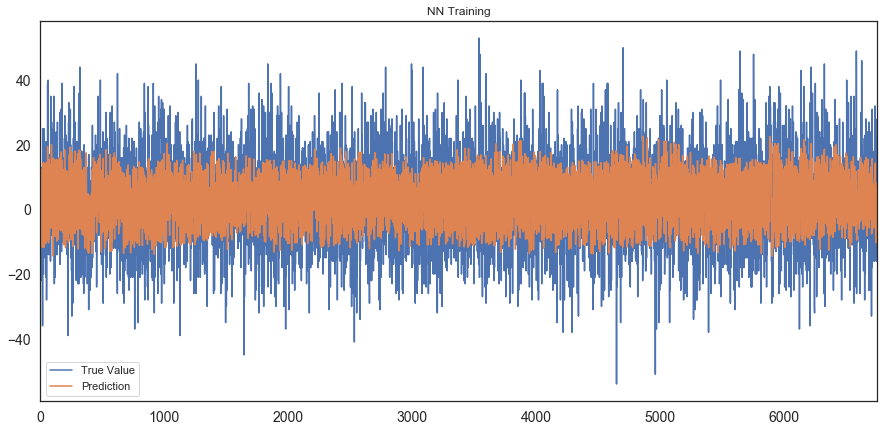

adj train r^2 = 0.28494647619711566
train mse = 128.08279719967243


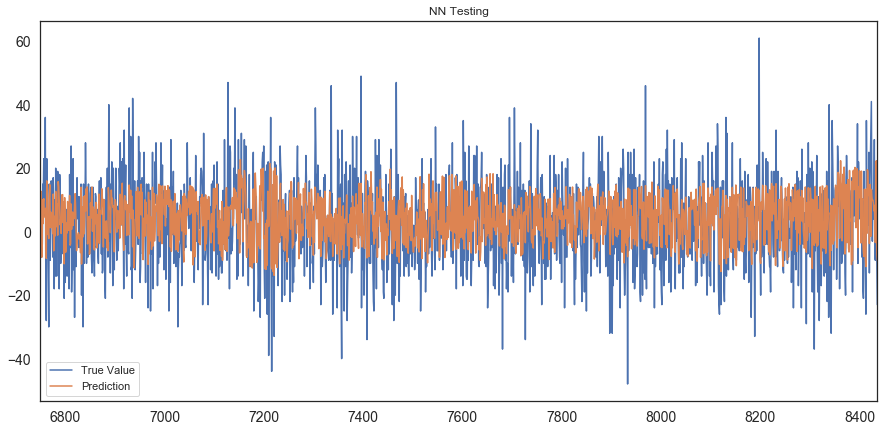

adj test r^2 = 0.19861260887697796
test mse = 150.39249437139495


In [71]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [72]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 72.73%
The testing accuracy is 69.59%


## LSTM

In [73]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [76]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='linear',kernel_initializer='lecun_uniform'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.WinMargin.values.ravel(), validation_data=[X_tst_t, test_y['WinMargin'].values.ravel()], epochs=40, verbose=1, shuffle=False)

Train on 6750 samples, validate on 1687 samples
Epoch 1/40
6750/6750 [==============================] - 18s 3ms/step - loss: 0.8399 - val_loss: 0.8996
Epoch 2/40
6750/6750 [==============================] - 18s 3ms/step - loss: 0.7664 - val_loss: 0.8392
Epoch 3/40
6750/6750 [==============================] - 17s 2ms/step - loss: 0.7582 - val_loss: 0.8485
Epoch 4/40
6750/6750 [==============================] - 15s 2ms/step - loss: 0.7497 - val_loss: 0.8385
Epoch 5/40
6750/6750 [==============================] - 16s 2ms/step - loss: 0.7471 - val_loss: 0.8397
Epoch 6/40
6750/6750 [==============================] - 15s 2ms/step - loss: 0.7435 - val_loss: 0.8380
Epoch 7/40
6750/6750 [==============================] - 16s 2ms/step - loss: 0.7415 - val_loss: 0.8370
Epoch 8/40
6750/6750 [==============================] - 15s 2ms/step - loss: 0.7394 - val_loss: 0.8348
Epoch 9/40
6750/6750 [==============================] - 15s 2ms/step - loss: 0.7372 - val_loss: 0.8327
Epoch 10/40
6750/6750 [==

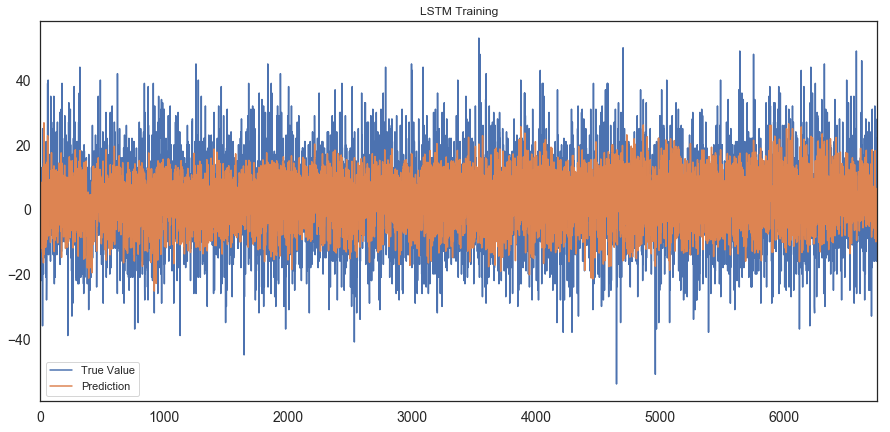

adj train r^2 = 0.3048773728185974
train mse = 124.51270782174693


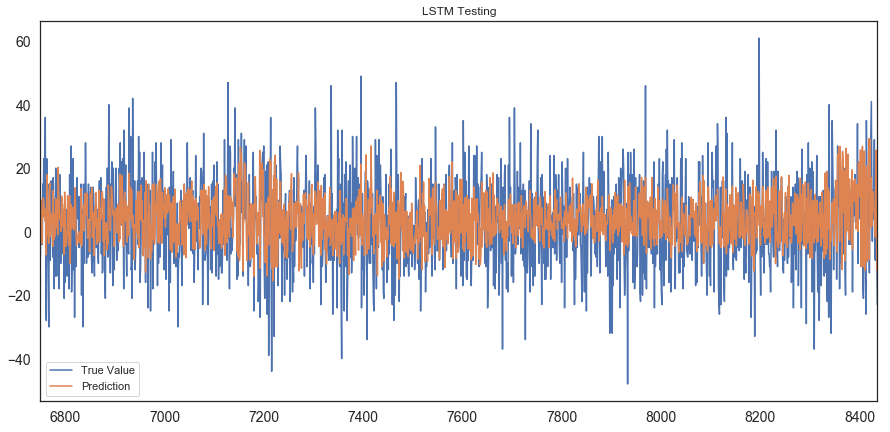

adj test r^2 = 0.19150896252130245
test mse = 151.72560131367564


In [77]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [78]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 72.74%
The testing accuracy is 69.41%


## TPOT

In [79]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(population_size=5, max_time_mins=2, verbosity=2, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.WinMargin.values.ravel())

/anaconda3/lib/python3.7/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


Generation 1 - Current best internal CV score: -0.7303903531966821
Generation 2 - Current best internal CV score: -0.7299089022470878
Generation 3 - Current best internal CV score: -0.7299089022470865
Generation 4 - Current best internal CV score: -0.7299089022470865
Generation 5 - Current best internal CV score: -0.7299089022470375
Generation 6 - Current best internal CV score: -0.7299089022470375
Generation 7 - Current best internal CV score: -0.7299089022470375
Generation 8 - Current best internal CV score: -0.7299089022470375
Generation 9 - Current best internal CV score: -0.7299089022470375
Generation 10 - Current best internal CV score: -0.7299089022470375
Generation 11 - Current best internal CV score: -0.7299089022470191
Generation 12 - Current best internal CV score: -0.7299089022470191
Generation 13 - Current best internal CV score: -0.7299089022470191
Generation 14 - Current best internal CV score: -0.7299089022470191
Generation 15 - Current best internal CV score: -0.729908

TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=2, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=5,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=2,
       warm_start=False)

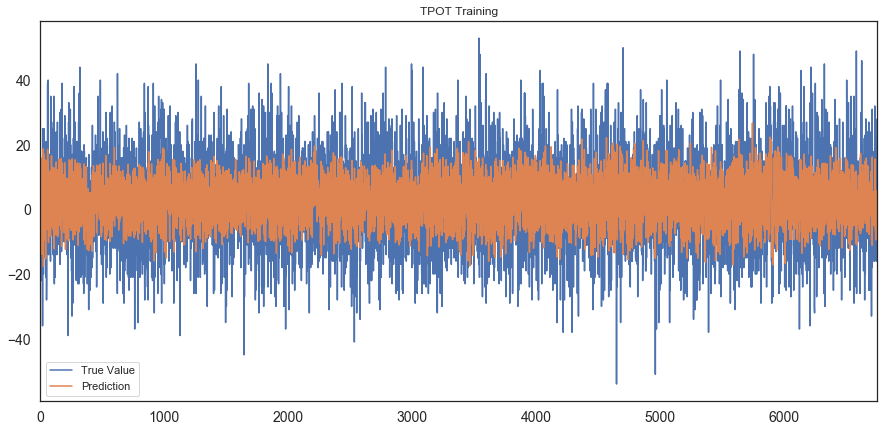

adj train r^2 = 0.264988927982272
train mse = 131.65766050082746


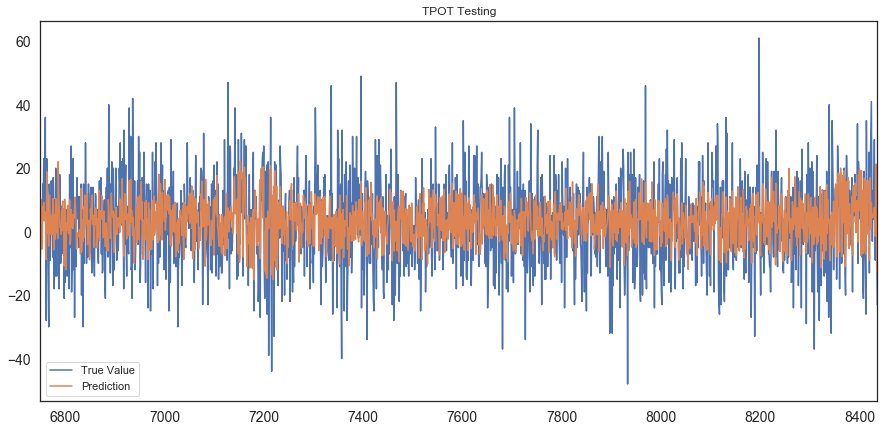

adj test r^2 = 0.22583608986188608
test mse = 145.28359540923987


In [80]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['WinMargin'] = sc2.inverse_transform(train_y2['WinMargin'])
test_y2['WinMargin'] = sc2.inverse_transform(test_y2['WinMargin'])
train_y2['WinMargin'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.WinMargin, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.WinMargin, train_y2.prediction)))
test_y2['WinMargin'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.WinMargin, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.WinMargin, test_y2.prediction)))

In [81]:
train_y3 = train_y2.copy(deep=True)
test_y3 = test_y2.copy(deep=True)
train_y3.loc[train_y3['prediction'] > train_x['average'], 'PredOver'] = 1
train_y3.loc[train_y3['prediction'] <= train_x['average'], 'PredOver'] = 0
train_y3.loc[train_y3['WinMargin'] > train_x['average'], 'Over'] = 1
train_y3.loc[train_y3['WinMargin'] <= train_x['average'], 'Over'] = 0
test_y3.loc[test_y3['prediction'] > test_x['average'], 'PredOver'] = 1
test_y3.loc[test_y3['prediction'] <= test_x['average'], 'PredOver'] = 0
test_y3.loc[test_y3['WinMargin'] > test_x['average'], 'Over'] = 1
test_y3.loc[test_y3['WinMargin'] <= test_x['average'], 'Over'] = 0
trainaccuracy =  accuracy_score(train_y3['PredOver'].values, train_y3['Over'].values) * 100
print('The training accuracy is ' + str(round(trainaccuracy,2)) + '%')
testaccuracy =  accuracy_score(test_y3['PredOver'].values, test_y3['Over'].values) * 100
print('The testing accuracy is ' + str(round(testaccuracy,2)) + '%')

The training accuracy is 71.17%
The testing accuracy is 70.01%
